<a href="https://colab.research.google.com/github/cristianmunoz1/DeepLearning-Project/blob/main/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carga de datos desde Kaggle

Los datasets surgen de una variación del dataset original que tenia un filtro de infrarrojos, dado la complejidad y tamaño del dataset, se tomaron las imagenes ahora en 3 canales rgb y 256x256


In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
import os

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cristianmunozbotero","key":"17708b2a1166ad809d661660bd12497a"}'}

In [ ]:
# Crear carpeta oculta y mover el archivo
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d nikitarom/planets-dataset


Dataset URL: https://www.kaggle.com/datasets/nikitarom/planets-dataset
License(s): DbCL-1.0
100% 1.50G/1.50G [00:17<00:00, 109MB/s]
100% 1.50G/1.50G [00:17<00:00, 92.7MB/s]


In [ ]:
!unzip -q planets-dataset.zip -d data/

## Carga de datos

In [ ]:
import osen to
print(os.listdir("data"))


['planet', 'test-jpg-additional']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image
from IPython.display import Image

Formación de las rutas para el acceso a los archivos JPG y .csv con las etiquetas del dataset

In [ ]:
PROJECT_FOLDER = 'data/planet/planet'

TRAIN_JPG_DIR = os.path.join(PROJECT_FOLDER, 'train-jpg')
TEST_JPG_DIR = os.path.join(PROJECT_FOLDER, 'test-jpg' )
TRAIN_CSV_PATH = os.path.join(PROJECT_FOLDER, 'train_classes.csv')
SUBMISSION_CSV_PATH = os.path.join(PROJECT_FOLDER, 'sample_submission.csv')

Listar primeras imagenes de los directorios

In [ ]:

print("Ejemplo imágenes train:", os.listdir(TRAIN_JPG_DIR)[:5])
print("Ejemplo imágenes test:", os.listdir(TEST_JPG_DIR)[:5])


Ejemplo imágenes train: ['train_13050.jpg', 'train_2962.jpg', 'train_32494.jpg', 'train_38042.jpg', 'train_21348.jpg']
Ejemplo imágenes test: ['test_17892.jpg', 'test_15780.jpg', 'test_9544.jpg', 'test_4113.jpg', 'test_33757.jpg']


In [ ]:
#imagenes de los directorios
print("Cantidad de imagenes en train-jpg: ", len(os.listdir(TRAIN_JPG_DIR)))
print("Cantidad de imagenes en test-jpg: ", len(os.listdir(TEST_JPG_DIR)))
print("Cantidad de imagenes en test-jpg-additional: ", len(os.listdir('data/test-jpg-additional/test-jpg-additional')))

Cantidad de imagenes en train-jpg:  40479
Cantidad de imagenes en test-jpg:  40669
Cantidad de imagenes en test-jpg-additional:  20522


Para este caso particular vemos dos columnas

image_name | tags

In [ ]:
#Dimensiones del dataset de train y tamaño del submission
train_df = pd.read_csv(TRAIN_CSV_PATH)


print("Dimensiones del dataset:", train_df.shape)
print(train_df.head())



Dimensiones del dataset: (40479, 2)
  image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road


Imagen particular, en este caso visualizamos una imagen al azar para confirmar la correcta formación de las rutas a los archivos


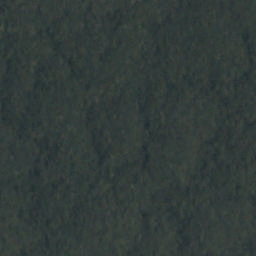

In [ ]:
idx_random = random.randint(0, train_df.shape[0]+1)
Image(filename=f"{TRAIN_JPG_DIR}/train_{idx_random}.jpg")

In [ ]:
from PIL import Image
img = Image.open(f"{TRAIN_JPG_DIR}/train_{idx_random}.jpg")
ancho, alto = img.size
print("Ancho:", ancho)
print("Alto:", alto)

Ancho: 256
Alto: 256


El numero de clases y como esas clases estan distribuidas por el dataset

In [ ]:

# Como las etiquetas están en formato multilabel separados por espacios
from collections import Counter

all_tags = " ".join(train_df['tags']).split()
tag_counts = Counter(all_tags)

print("Número de clases:", len(tag_counts))
print("Frecuencia de etiquetas más comunes:")
for tag, count in tag_counts.most_common(10):
    print(tag, ":", count)

Número de clases: 17
Frecuencia de etiquetas más comunes:
primary : 37513
clear : 28431
agriculture : 12315
road : 8071
water : 7411
partly_cloudy : 7261
cultivation : 4547
habitation : 3660
haze : 2697
cloudy : 2089


Aplicación de one-hot encoding a las etiquetas del dataset

In [ ]:
dummies = train_df['tags'].str.get_dummies(' ') #separación de espacio
df_new = pd.concat([train_df, dummies], axis=1)

labels = dummies.columns.values
N_LABELS = len(labels)
dummies

agriculture  artisinal_mine  bare_ground  blooming  blow_down  clear  \
0                0               0            0         0          0      0   
1                1               0            0         0          0      1   
2                0               0            0         0          0      1   
3                0               0            0         0          0      1   
4                1               0            0         0          0      1   
...            ...             ...          ...       ...        ...    ...   
40474            0               0            0         0          0      1   
40475            0               0            0         0          0      0   
40476            1               0            0         0          0      1   
40477            1               0            0         0          0      1   
40478            1               0            0         0          0      0   

       cloudy  conventional_mine  cultivation  habitation  haze  \
0           0                  0            0           0     1   
1           0                  0            0           0     0   
2           0                  0            0           0     0   
3           0                  0            0           0     0   
4           0                  0            0           1     0   
...       ...                ...          ...         ...   ...   
40474       0                  0            0           0     0   
40475       1                  0            0           0     0   
40476       0                  0            0           0     0   
40477       0                  0            0           0     0   
40478       0                  0            1           0     0   

       partly_cloudy  primary  road  selective_logging  slash_burn  water  
0                  0        1     0                  0           0      0  
1                  0        1     0                  0           0      1  
2                  0        1     0                  0           0      0  
3                  0        1     0                  0           0      0  
4                  0        1     1                  0           0      0  
...              ...      ...   ...                ...         ...    ...  
40474              0        1     0                  0           0      0  
40475              0        0     0                  0           0      0  
40476              0        1     0                  0           0      0  
40477              0        1     1                  0           0      0  
40478              1        1     0                  0           0      0  

[40479 rows x 17 columns]

Miramos la distribución de etiquetas, y notamos el desbalanceo de clases, podemos ver al observar la gráfica de distribución de etiquetas se nota inmediatamente que el dataset está fuertemente desbalanceado. Las clases primary y clear representan la gran mayoría de las muestras, muy por encima del resto. Luego aparecen clases intermedias como `[road, water, partly_cloudy, cultivation, habitation o haze]`, que aunque tienen menos ejemplos siguen estando relativamente bien representadas. Sin embargo, el problema serio aparece en las clases minoritarias: categorías como [bare_ground, selective_logging, artisinal_mine, blooming, slash_burn, conventional_mine y blow_down]` tienen muy pocas instancias, algunas de ellas apenas unas decenas. Esto significa que el modelo, si se entrena sin ninguna corrección, terminará sesgado hacia las clases mayoritarias y prácticamente ignorará las menos comunes.

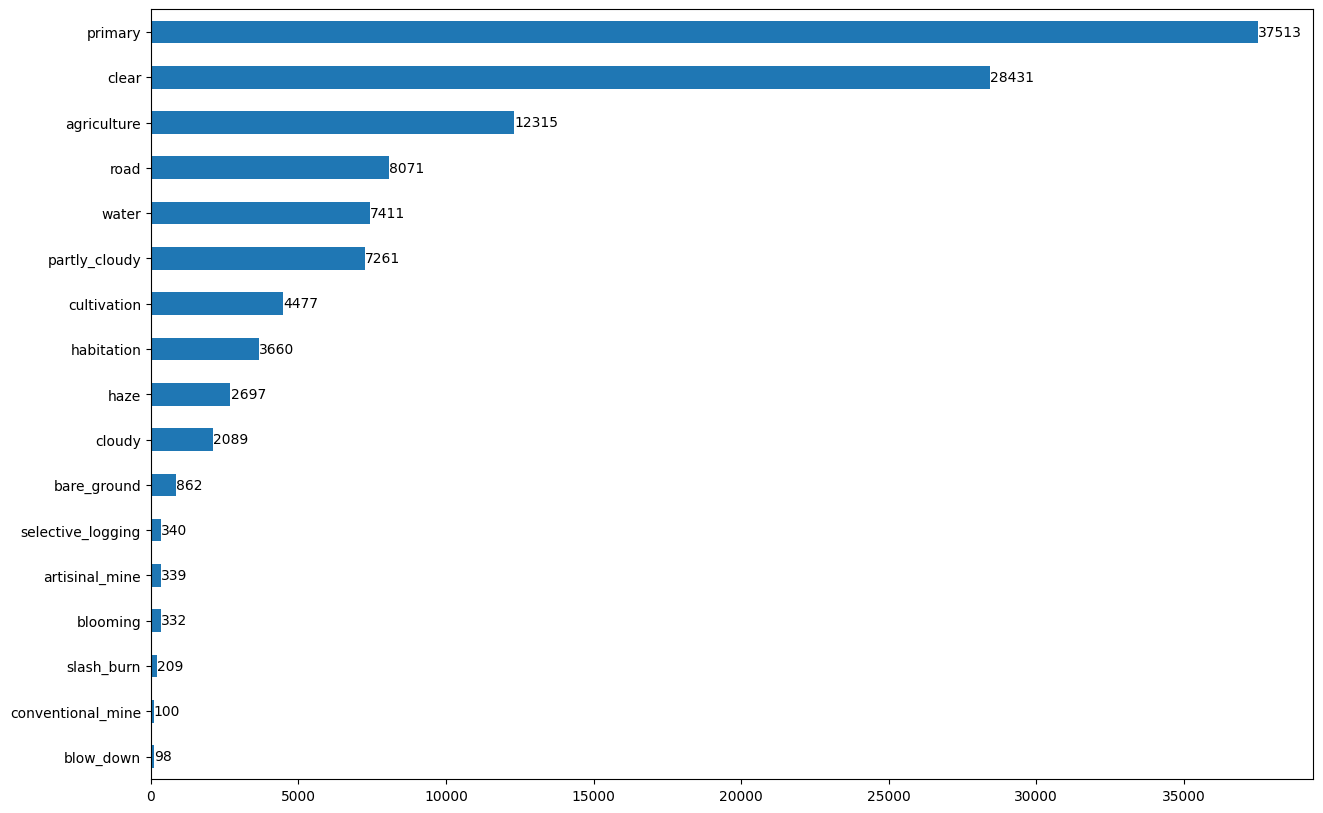

In [ ]:
label_count = dummies.sum(axis=0).sort_values()

label_count.plot(kind='barh', figsize=(15, 10))
for i in range(label_count.shape[0]):
    plt.text(label_count.iloc[i] + 4, i, label_count.iloc[i], va='center')

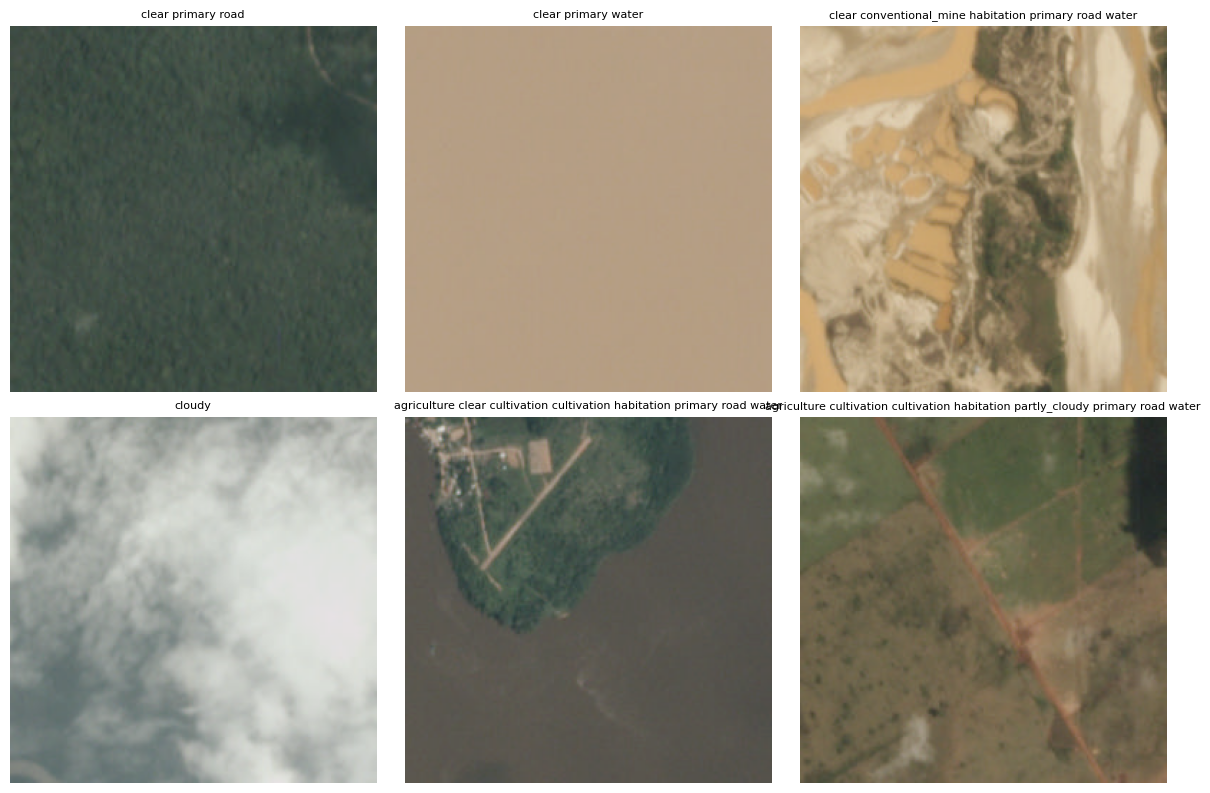

In [ ]:
# Mostrar imágenes de ejemplo con sus etiquetas
sample = train_df.sample(6, random_state=42)

plt.figure(figsize=(12,8))
for i, row in enumerate(sample.itertuples(), 1):
    img_path = os.path.join(TRAIN_JPG_DIR, f"{row.image_name}.jpg")
    img = Image.open(img_path)
    plt.subplot(2, 3, i)
    plt.imshow(img)
    plt.axis("off")
    plt.title(row.tags, fontsize=8)
plt.tight_layout()
plt.show()


One-hot encode the labels

In [ ]:
print(f"There are {N_LABELS} unique labels including {labels}")

There are 17 unique labels including ['agriculture' 'artisinal_mine' 'bare_ground' 'blooming' 'blow_down'
 'clear' 'cloudy' 'conventional_mine' 'cultivation' 'habitation' 'haze'
 'partly_cloudy' 'primary' 'road' 'selective_logging' 'slash_burn' 'water']


## Muestreo de etiquetas con pocas frecuencias

En este caso el conjunto de etiquetas del dataset no esta distribido de manera uniforme, Etiquetas como ` blooming`,` blow_down`, ` slash_burn` aparecen raramente en el dataset y con una prorpocionalidad de frecuencia muy baja.  





In [ ]:
images_title = []

for i, label in enumerate(labels):
   #filtro por etiqueatr
   match_rows = train_df[train_df['tags'].str.contains(label)]

   image_name = match_rows.iloc[i]['image_name']

   images_title.append(image_name + '.jpg')

In [ ]:
images_title

['train_1.jpg',
 'train_185.jpg',
 'train_57.jpg',
 'train_394.jpg',
 'train_924.jpg',
 'train_8.jpg',
 'train_27.jpg',
 'train_6357.jpg',
 'train_146.jpg',
 'train_103.jpg',
 'train_180.jpg',
 'train_88.jpg',
 'train_13.jpg',
 'train_67.jpg',
 'train_1386.jpg',
 'train_2238.jpg',
 'train_71.jpg']

## Imagenes relacionadas a cada etiqueta
Hacemos un sample para mostrar imagenes de ejemplo para cada etiqueta, a simple vista notamos las diferencias de cada imagen relacionado, teniendo el sesgo que puede existir con imagenes que tengan mas de 1 etiqueta

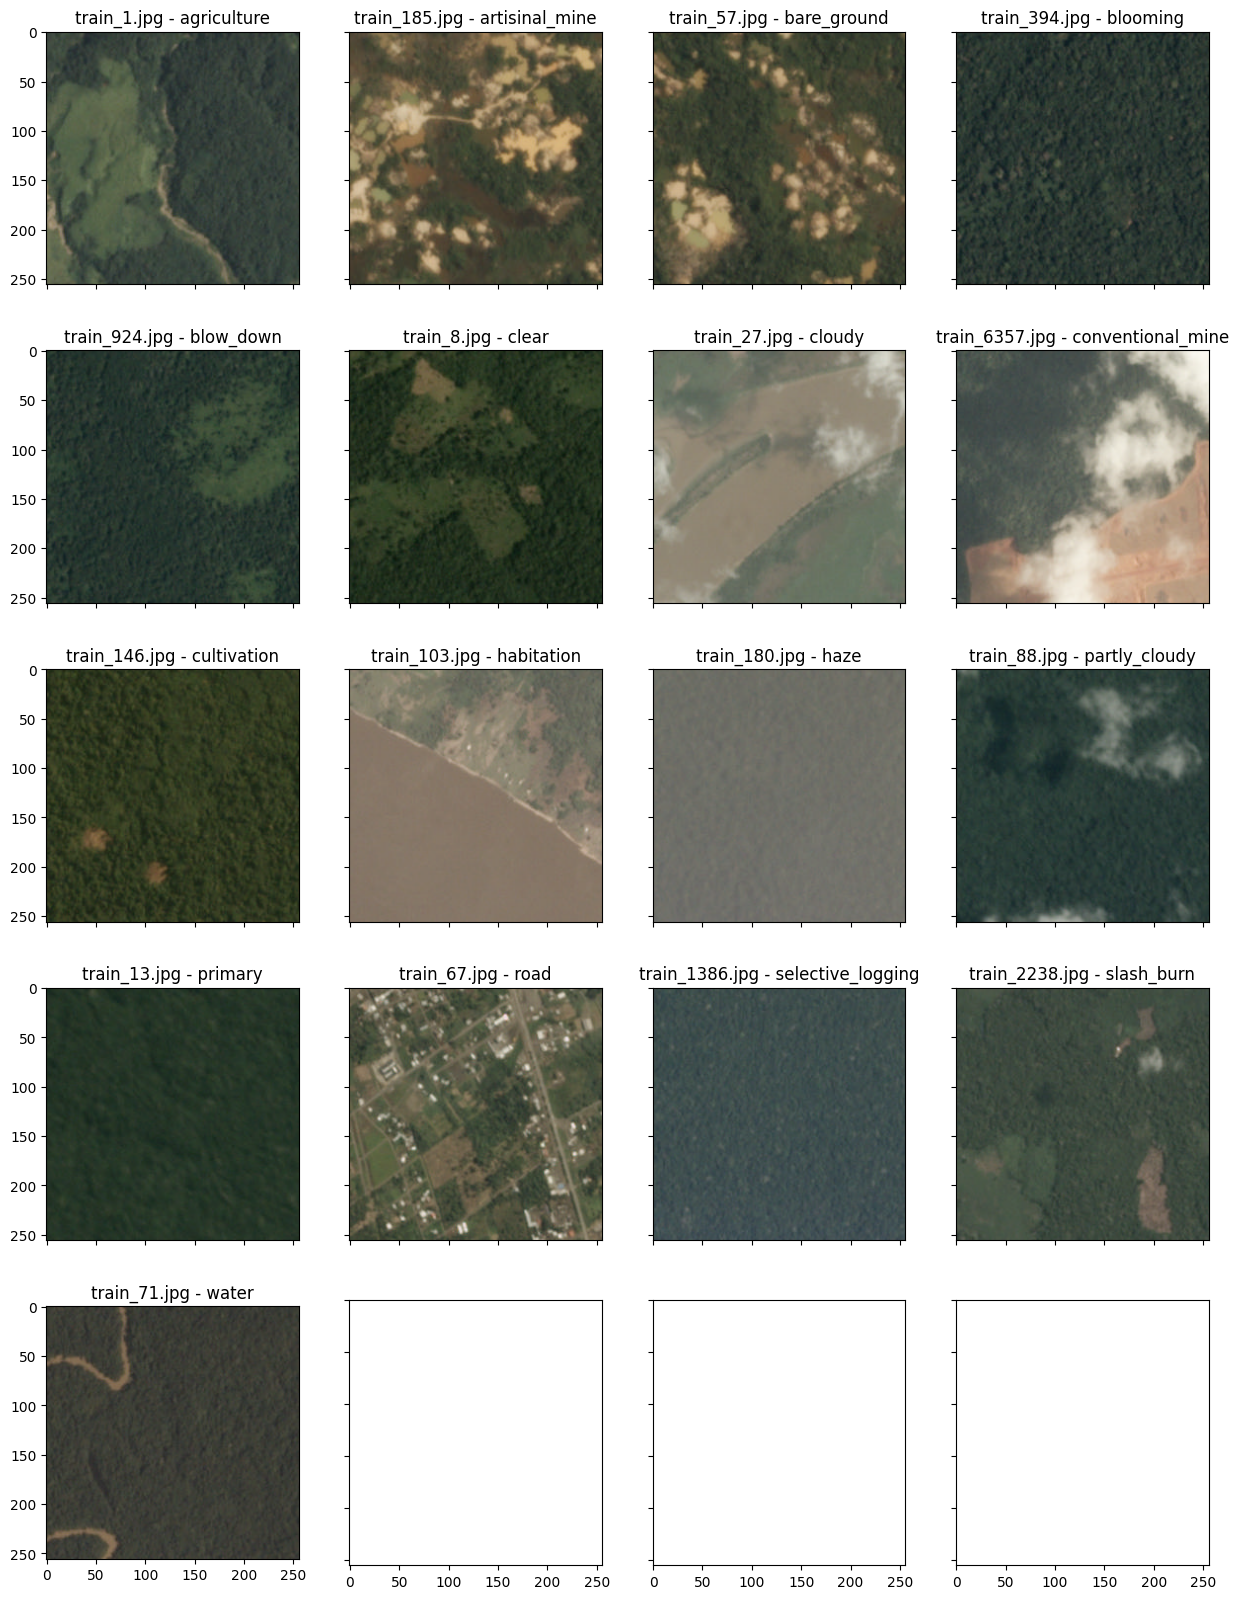

In [ ]:
_, axs = plt.subplots(5, 4, sharex='col', sharey='row', figsize=(15, 20))
axs = axs.ravel()

for i, (image_name, label) in enumerate(zip(images_title, labels)):
    img_path = os.path.join(TRAIN_JPG_DIR, image_name)
    img = plt.imread(img_path)
    axs[i].imshow(img)
    axs[i].set_title(f'{image_name} - {label}')

## Visualización estadistica
En esta celda hablamos de como estan distribuidas las etiquetas, en cada imagen, por ejemplo notamos que la mayor frecuencia se da con imagenes que tiene 2 etiquetas.

La distribución de etiquetas por imagen muestra que la gran mayoría de las imágenes contienen más de una etiqueta, lo cual confirma que se trata de un problema multietiqueta con combinaciones frecuentes de clases. En particular, se observa que el mayor volumen de datos corresponde a imágenes con 2 etiquetas, muy por encima del resto. Luego hay cantidades también significativas con 3 y 4 etiquetas, mientras que las imágenes con 1, 5 o 6 etiquetas aparecen en menor proporción. A partir de 7 etiquetas la presencia es prácticamente residual.

Esto sugiere que las escenas suelen estar compuestas por múltiples elementos simultáneamente (por ejemplo, bosque + nubes, agricultura + caminos, etc.), lo que implica que el modelo debe ser capaz de aprender combinaciones comunes de clases y manejar correctamente la coocurrencia entre ellas. También es un recordatorio de que no basta con tratar las clases de forma independiente: la estructura multietiqueta del dataset introduce dependencias y patrones entre etiquetas que pueden ser útiles para mejorar el rendimiento del modelo.

Estadísticas:
count    40479.000000
mean         2.872551
std          1.222771
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max          9.000000
Name: num_tags, dtype: float64


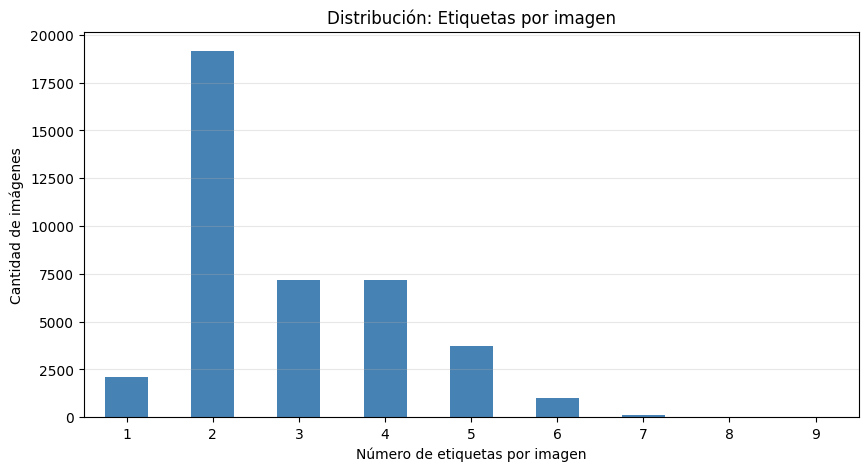

In [ ]:

train_df['num_tags'] = train_df['tags'].apply(lambda x: len(x.split()))

print("Estadísticas:")
print(train_df['num_tags'].describe())
# Visualizar distribución
plt.figure(figsize=(10, 5))
train_df['num_tags'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.xlabel('Número de etiquetas por imagen')
plt.ylabel('Cantidad de imágenes')
plt.title('Distribución: Etiquetas por imagen')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

Para este caso estamos miramos que combinaciones de etiquetas son mas frecuentes por ejemplo etiquetas como `clear` y `primary` que son de las mas frecuentadas tambien son la combinación mas popular en el dataset

In [ ]:
tag_combinations = train_df['tags'].value_counts().head(15)

print("\nCombinaciones de etiquetas más frecuentes:")
print(tag_combinations)




Combinaciones de etiquetas más frecuentes:
tags
clear primary                                13636
partly_cloudy primary                         3630
cloudy                                        2089
clear primary water                           1850
agriculture clear primary road                1680
agriculture clear primary                     1626
haze primary                                  1471
agriculture clear cultivation primary         1170
agriculture clear habitation primary road     1125
agriculture clear primary water                712
agriculture partly_cloudy primary              692
partly_cloudy primary water                    595
agriculture partly_cloudy primary road         527
clear primary road water                       504
clear cultivation primary                      472
Name: count, dtype: int64


La gráfica de las combinaciones más frecuentes de etiquetas revela cuáles son los patrones multietiqueta que aparecen con mayor regularidad en el dataset. Tal como se observa, la combinación `clear - primary` es, por un amplio margen, la más común, lo que confirma que estas dos etiquetas forman parte del núcleo dominante del conjunto de datos. Le siguen otras combinaciones frecuentes como `partly_cloudy - primary`o simplemente `cloudy`, que también reflejan condiciones atmosféricas recurrentes junto con la presencia de vegetación primaria.

A medida que avanzamos en la lista, aparecen combinaciones que incluyen elementos adicionales como `road, water, agriculture o haze`, lo que demuestra que los paisajes suelen contener múltiples características simultáneamente. Sin embargo, incluso estas combinaciones más ricas siguen estando lejos en frecuencia comparadas con las dominantes. Esto refuerza la idea de que el dataset no solo está desbalanceado a nivel de clases individuales, sino también a nivel de coocurrencias entre etiquetas: algunas combinaciones se repiten con enorme frecuencia mientras que otras son mucho más escasas.

Este análisis es útil porque permite anticipar qué relaciones entre etiquetas el modelo aprenderá con mayor facilidad y cuáles requerirán mayor atención, especialmente en un contexto multietiqueta donde la correlación entre clases puede influir en el desempeño final del sistema

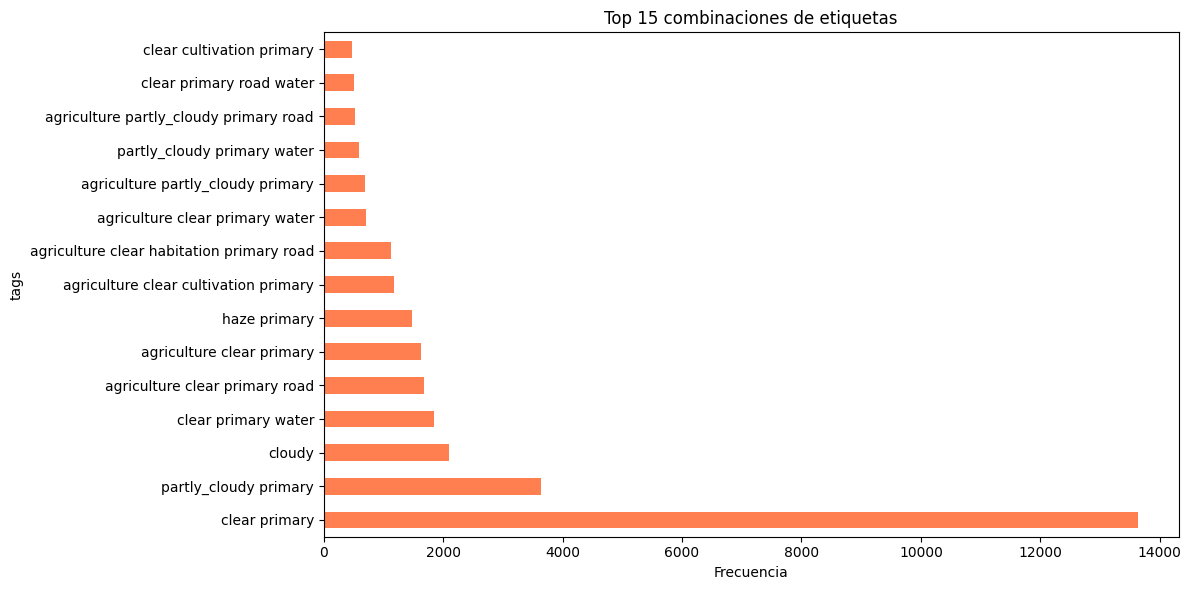

In [ ]:
plt.figure(figsize=(12, 6))
tag_combinations.plot(kind='barh', color='coral')
plt.xlabel('Frecuencia')
plt.title('Top 15 combinaciones de etiquetas')
plt.tight_layout()
plt.show()


En este caso vemos que todas las imagenes siguen el mismo formato de tamaño

In [ ]:
sample_imgs = train_df.sample(100, random_state=42)  #Muestra aleatoria de 100 imagenes
img_sizes = []

for img_name in sample_imgs['image_name']:
    img_path = os.path.join(TRAIN_JPG_DIR, f"{img_name}.jpg")
    img = Image.open(img_path)
    img_sizes.append(img.size)  # (width, height) tupla

# Convertir a DataFrame
sizes_df = pd.DataFrame(img_sizes, columns=['width', 'height'])

print("\nDimensiones de imágenes (muestra de 100):")
print(sizes_df.describe())

# Verificar si todas tienen el mismo tamaño
unique_sizes = sizes_df.drop_duplicates()
print(f"\nTamaños únicos encontrados: {len(unique_sizes)}")
print(unique_sizes.head())


Dimensiones de imágenes (muestra de 100):
       width  height
count  100.0   100.0
mean   256.0   256.0
std      0.0     0.0
min    256.0   256.0
25%    256.0   256.0
50%    256.0   256.0
75%    256.0   256.0
max    256.0   256.0

Tamaños únicos encontrados: 1
   width  height
0    256     256


## Matriz de correlación

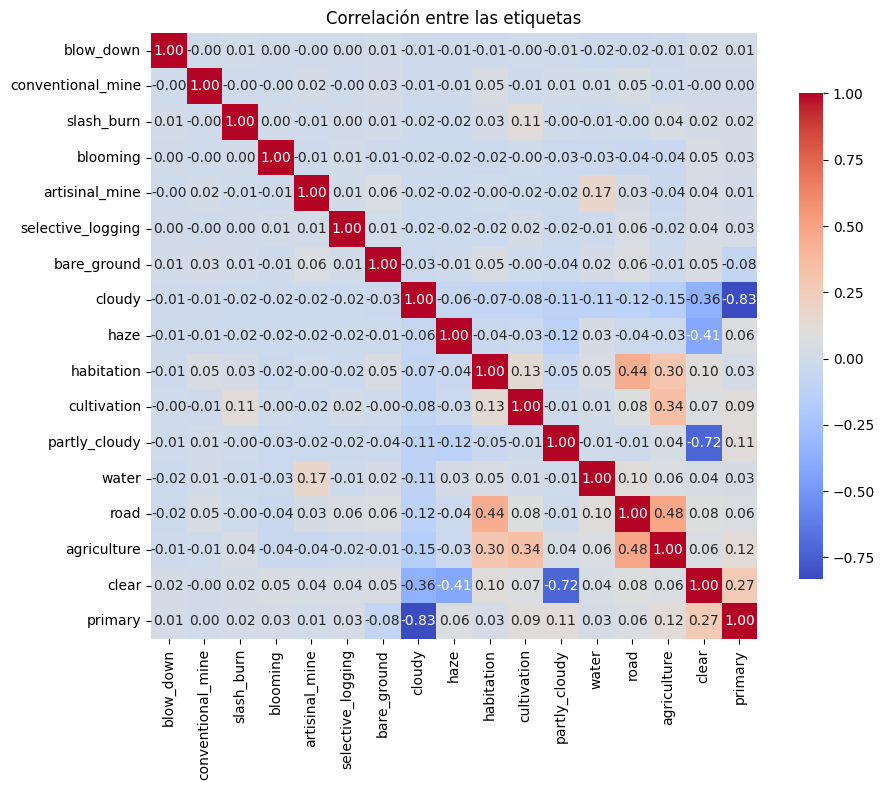

In [ ]:
import seaborn as sns

top_labels = label_count.tail(17).index
correlation_matrix = dummies[top_labels].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlación entre las etiquetas')
plt.tight_layout()
plt.show()

Podemos ver que la matriz muestra mayor variación en las primeras 10 categorias, por lo que podemos hacer un acercamiento en estas clases, para las demas clases, no se nota mucha relación por lo que no hay valores grandes

+ `road - agriculture` tienen correlación moderada positiva (0.48): suelen coincidir.

+ `cloudy - primary` tienen una fuerte correlación negativa (-0.83): normalmente no aparecen juntas.

* La mayoría de correlaciones son bajas, mostrando que las etiquetas son mayormente independientes.

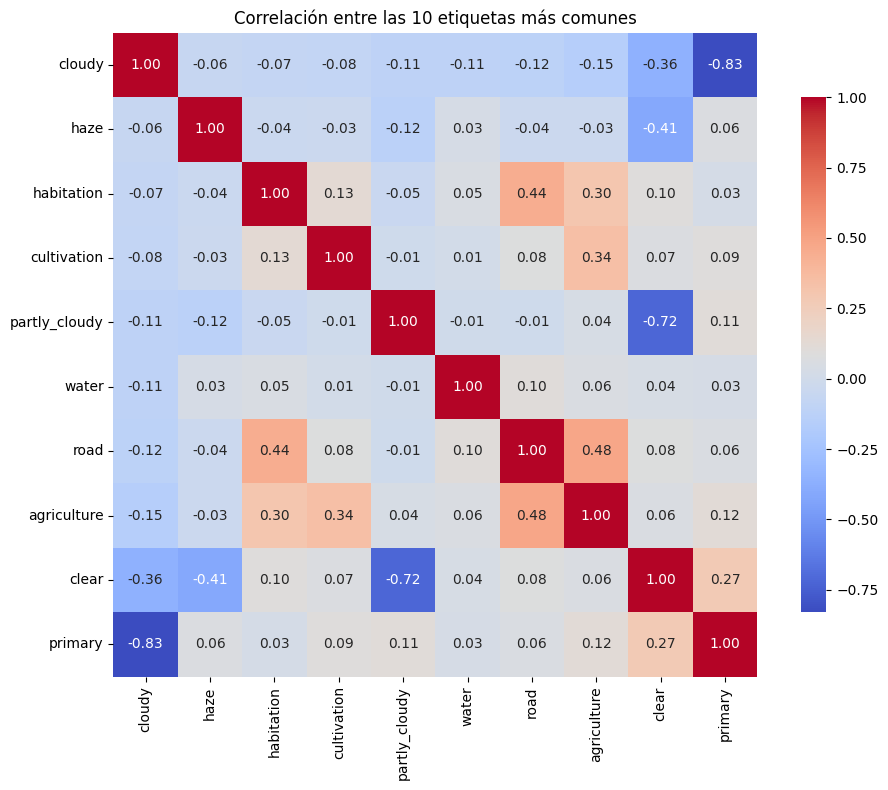

In [ ]:
# Calcular correlación entre las etiquetas más comunes (top 10)
top_labels = label_count.tail(10).index
correlation_matrix = dummies[top_labels].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlación entre las 10 etiquetas más comunes')
plt.tight_layout()
plt.show()

##Etiquetas grupales


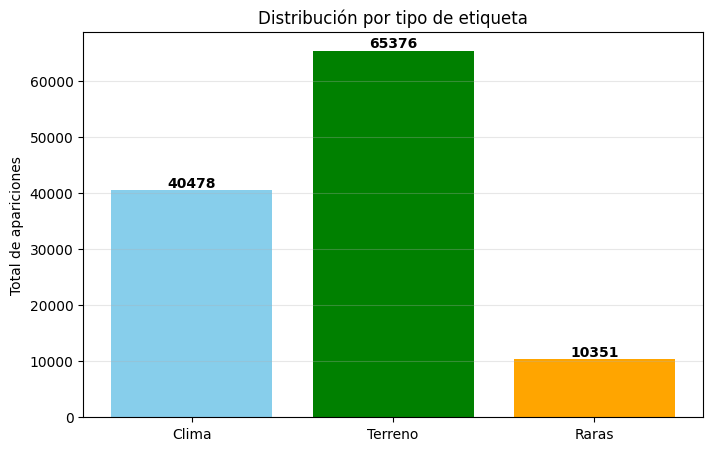

In [ ]:
weather_tags = ['clear', 'cloudy', 'haze', 'partly_cloudy']
land_tags = ['primary', 'agriculture', 'water', 'cultivation', 'habitation']
rare_tags = ['artisinal_mine', 'bare_ground', 'blooming', 'blow_down',
             'conventional_mine', 'road', 'selective_logging', 'slash_burn']


weather_count = dummies[weather_tags].sum(axis=1).sum()
land_count = dummies[land_tags].sum(axis=1).sum()
rare_count = dummies[rare_tags].sum(axis=1).sum()

categories = ['Clima', 'Terreno', 'Raras']
counts = [weather_count, land_count, rare_count]

#Visualización
plt.figure(figsize=(8, 5))
plt.bar(categories, counts, color=['skyblue', 'green', 'orange'])
plt.ylabel('Total de apariciones')
plt.title('Distribución por tipo de etiqueta')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(counts):
    plt.text(i, v + 500, str(v), ha='center', fontweight='bold')
plt.show()

## Imagenes poco comunes

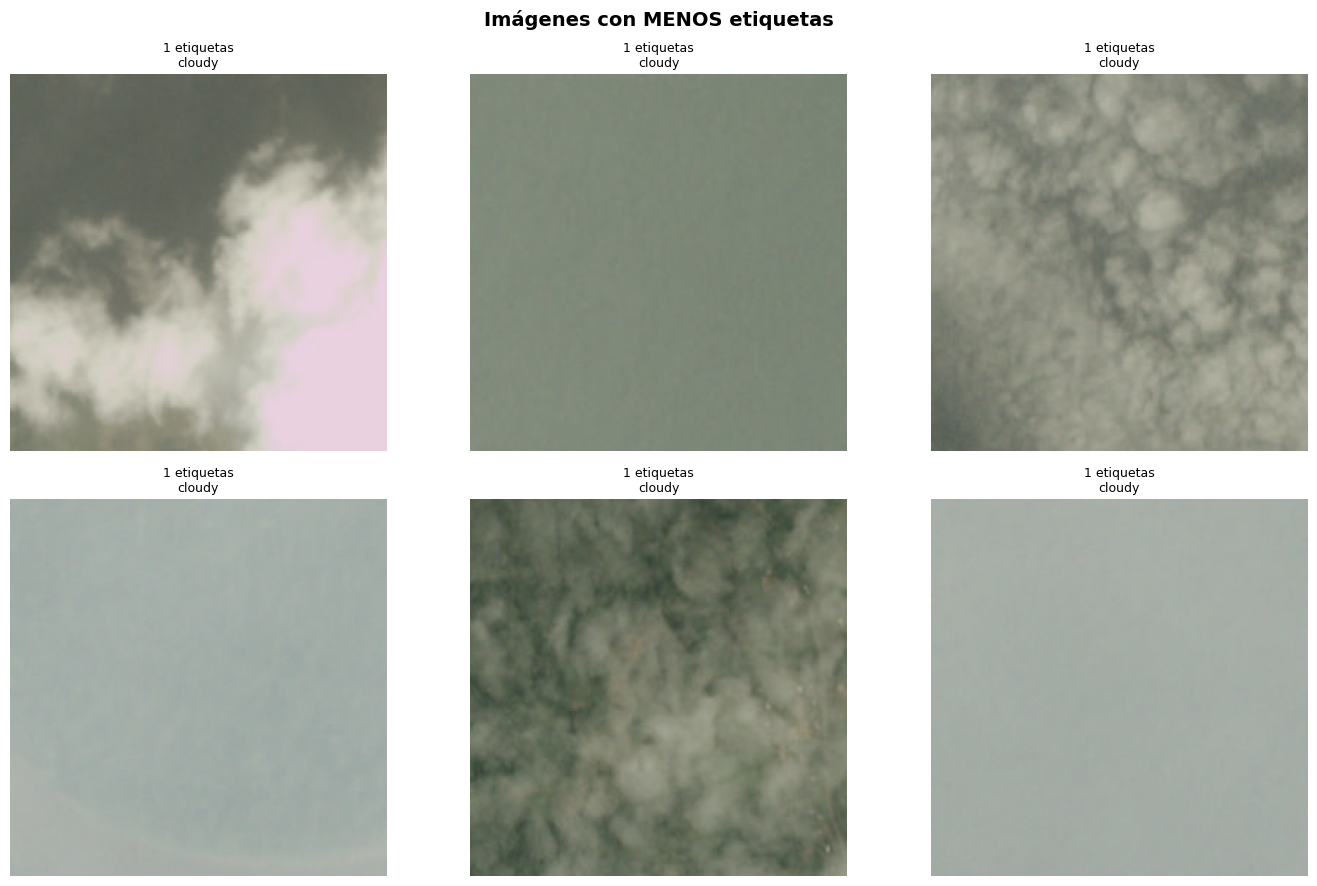

In [ ]:
min_tags = train_df.nsmallest(6, 'num_tags')

fig, axes = plt.subplots(2, 3, figsize=(14, 9))
fig.suptitle('Imágenes con MENOS etiquetas', fontsize=14, fontweight='bold')

for i, row in enumerate(min_tags.itertuples()):
    img_path = os.path.join(TRAIN_JPG_DIR, f"{row.image_name}.jpg")
    img = Image.open(img_path)
    ax = axes[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"{row.num_tags} etiquetas\n{row.tags}", fontsize=9)

plt.tight_layout()
plt.show()


Y aca vemos las que mas apariciones tienen

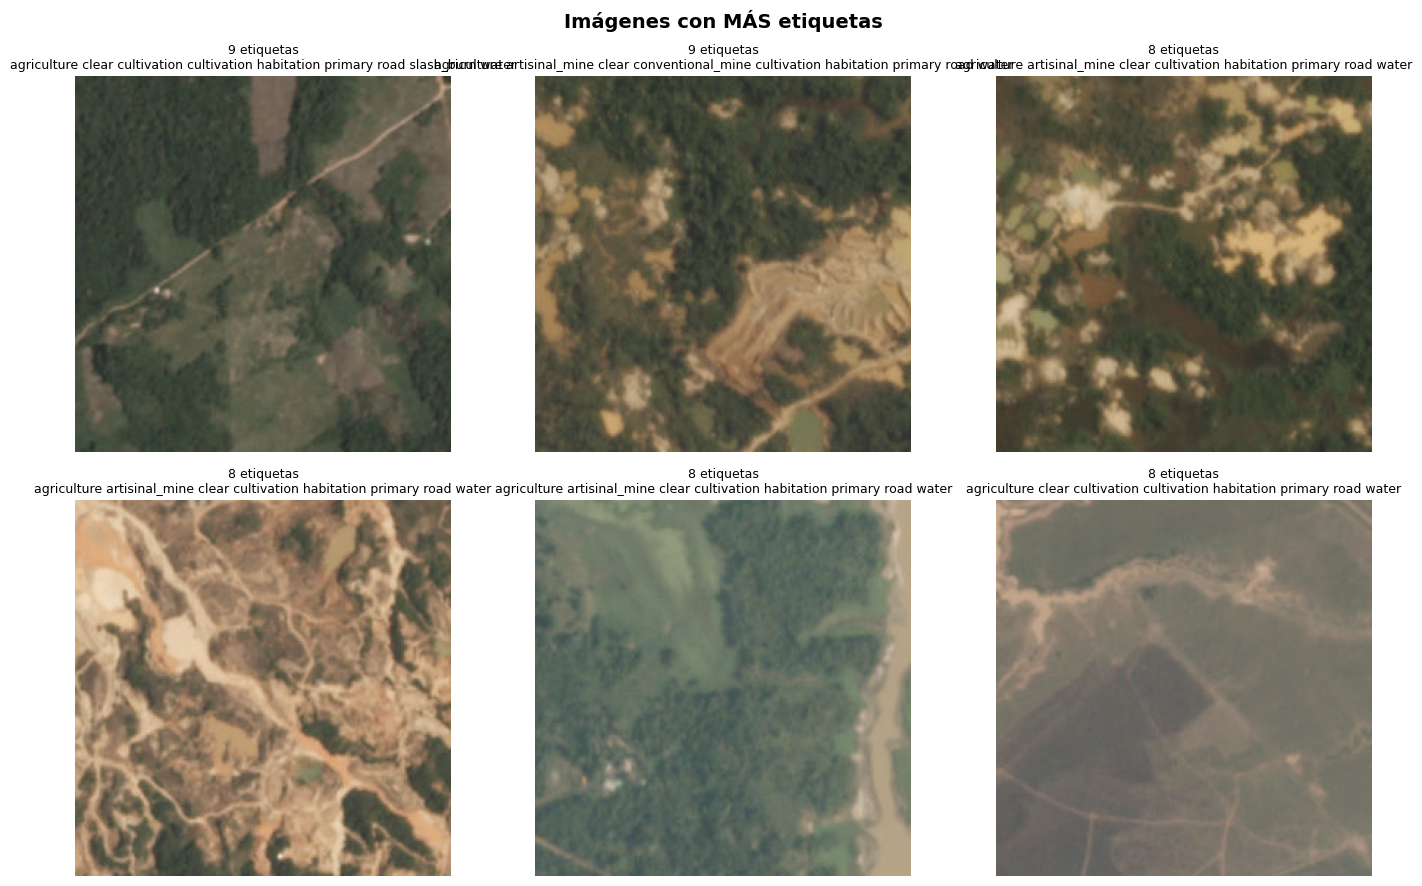

In [ ]:
max_tags = train_df.nlargest(6, 'num_tags')

fig, axes = plt.subplots(2, 3, figsize=(14, 9))
fig.suptitle('Imágenes con MÁS etiquetas', fontsize=14, fontweight='bold')

for i, row in enumerate(max_tags.itertuples()):
    img_path = os.path.join(TRAIN_JPG_DIR, f"{row.image_name}.jpg")
    img = Image.open(img_path)
    ax = axes[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"{row.num_tags} etiquetas\n{row.tags}", fontsize=9)

plt.tight_layout()
plt.show()


## Resumen general

In [ ]:

print("RESUMEN DEL DATASET")

print(f"Total de imágenes de entrenamiento: {len(train_df)}")
print(f"Total de imágenes de prueba: {len(os.listdir(TEST_JPG_DIR))}")
print(f"Número de clases únicas: {N_LABELS}")
print(f"Promedio de etiquetas por imagen: {train_df['num_tags'].mean():.2f}")
print(f"Mínimo de etiquetas en una imagen: {train_df['num_tags'].min()}")
print(f"Máximo de etiquetas en una imagen: {train_df['num_tags'].max()}")
print(f"Etiqueta más común: {label_count.idxmax()} ({label_count.max()} apariciones)")
print(f"Etiqueta menos común: {label_count.idxmin()} ({label_count.min()} apariciones)")


RESUMEN DEL DATASET
Total de imágenes de entrenamiento: 40479
Total de imágenes de prueba: 40669
Número de clases únicas: 17
Promedio de etiquetas por imagen: 2.87
Mínimo de etiquetas en una imagen: 1
Máximo de etiquetas en una imagen: 9
Etiqueta más común: primary (37513 apariciones)
Etiqueta menos común: blow_down (98 apariciones)
